<a href="https://colab.research.google.com/github/charleshart0301/DSPS_cHart/blob/main/HW7/Charles_Hart_HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [97]:
import os
import json

kaggle_json_path = "/content/gdrive/My Drive/kaggle.json"

with open(kaggle_json_path, "r") as f:
    envs = json.load(f)

os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [98]:
!pip install kaggle
import kaggle

In [99]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy as sp

In [100]:
import kagglehub
from kagglehub import KaggleDatasetAdapter


path = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2024")
files = os.listdir(path)
csv_file = [f for f in files if f.endswith('.csv')][0]
file_path = os.path.join(path, csv_file)
happiness = pd.read_csv(file_path, encoding='ISO-8859-1')

Using Colab cache for faster access to the 'world-happiness-report-2024' dataset.


In [101]:
happiness

,ï»¿Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [102]:
happiness.head()

,ï»¿Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


Task 3: For each numerical column X, prepare a column that is a minmax version of X and a version that is the standardized version of X, store them in the same or another dataframe (your choice) as, for example X_minmax and X_standardized (choose the variable or dataframe names you want, but make them meaningful and descriptive!)

Task 4: For each numerical column pair X and Y make a scatter plot of Y vs X with the data as is read in, a scatter plot of Y_minmax vs X_minmax, and a scatter plot of Y_standardized and X_standardized

In [103]:
happiness_minmax = pd.DataFrame()
happiness_minmax["Country"] = happiness["ï»¿Country name"]
#happiness_minmax["minmax_ladderscore"] = (happiness["Ladder score"] - happiness["Ladder score"].min()) / (happiness["Ladder score"].max() - happiness["Ladder score"].min())



happiness_minmax["minmax_ladder_score"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Ladder score"]])
happiness_minmax["minmax_upperwhisker"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["upperwhisker"]])
happiness_minmax["minmax_lowerwhisker"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["lowerwhisker"]])
happiness_minmax["minmax_GDP"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Explained by: Log GDP per capita"]])
happiness_minmax["minmax_social"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Explained by: Social support"]])
happiness_minmax["minmax_LifeExpectancy"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Explained by: Healthy life expectancy"]])
happiness_minmax["minmax_freedom"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Explained by: Freedom to make life choices"]])
happiness_minmax["minmax_generosity"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Explained by: Generosity"]])
happiness_minmax["minmax_corruption"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Explained by: Perceptions of corruption"]])
happiness_minmax["minmax_dystopianResidual"] = skl.preprocessing.MinMaxScaler().fit_transform(happiness[["Dystopia + residual"]])
happiness_minmax



happiness_standard = pd.DataFrame()
happiness_standard["Country"] = happiness["ï»¿Country name"]


happiness_standard["std_ladder_score"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Ladder score"]])
happiness_standard["std_upperwhisker"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["upperwhisker"]])
happiness_standard["std_lowerwhisker"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["lowerwhisker"]])
happiness_standard["std_GDP"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Explained by: Log GDP per capita"]])
happiness_standard["std_social"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Explained by: Social support"]])
happiness_standard["std_LifeExpectancy"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Explained by: Healthy life expectancy"]])
happiness_standard["std_freedom"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Explained by: Freedom to make life choices"]])
happiness_standard["std_generosity"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Explained by: Generosity"]])
happiness_standard["std_corruption"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Explained by: Perceptions of corruption"]])
happiness_standard["std_dystopianResidual"] = skl.preprocessing.StandardScaler().fit_transform(happiness[["Dystopia + residual"]])

happiness_standard

,Country,std_ladder_score,std_upperwhisker,std_lowerwhisker,std_GDP,std_social,std_LifeExpectancy,std_freedom,std_generosity,std_corruption,std_dystopianResidual
0,Finland,1.897299,1.888702,1.904544,1.098248,1.317793,1.059525,1.472287,-0.058370,3.115426,0.945009
1,Denmark,1.761865,1.758376,1.763375,1.249342,1.161225,1.083865,1.249941,0.788873,3.131326,0.569683
2,Iceland,1.712148,1.717541,1.706738,1.185599,1.453284,1.199485,1.225236,1.526794,0.221634,0.885255
3,Sweden,1.556999,1.547249,1.566414,1.178516,1.104018,1.235996,1.342585,1.021182,2.940526,0.153278
4,Israel,1.554427,1.532478,1.574867,1.001453,1.140149,1.333360,0.125863,0.091947,0.309084,1.348343
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),-1.913724,-1.893350,-1.932393,-1.994458,-1.413110,-1.575378,-0.911747,0.583895,-0.652863,-0.884935
139,Sierra Leone,-1.956583,-1.976758,-1.935774,-1.711156,-1.711191,-1.630145,-0.936452,0.474573,-0.803913,-0.948423
140,Lesotho,-2.007156,-1.887268,-2.121746,-1.434938,-0.853079,-3.169707,-0.602935,-0.878283,-0.549514,-1.308810
141,Lebanon,-2.417746,-2.471127,-2.365200,-0.004266,-1.678071,0.213678,-2.764624,-1.069595,-0.994713,-3.079000


In [49]:
happiness_minmax

,Country,minmax_ladder_score,minmax_upperwhisker,minmax_lowerwhisker,minmax_GDP,minmax_social,minmax_LifeExpectancy,minmax_freedom,minmax_generosity,minmax_corruption,minmax_dystopianResidual
0,Finland,1.000000,1.000000,1.000000,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726
1,Denmark,0.973754,0.975166,0.972167,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275
2,Iceland,0.964120,0.967384,0.961000,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306
3,Sweden,0.934053,0.934934,0.933333,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660
4,Israel,0.933555,0.932119,0.935000,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),0.261462,0.279305,0.243500,0.249416,0.411255,0.305718,0.548088,0.471322,0.125217,0.382612
139,Sierra Leone,0.253156,0.263411,0.242833,0.305465,0.350031,0.295216,0.543453,0.451372,0.092174,0.371540
140,Lesotho,0.243355,0.280464,0.206167,0.360112,0.526283,0.000000,0.606025,0.204489,0.147826,0.308694
141,Lebanon,0.163787,0.169205,0.158167,0.643157,0.356834,0.648775,0.200463,0.169576,0.050435,0.000000


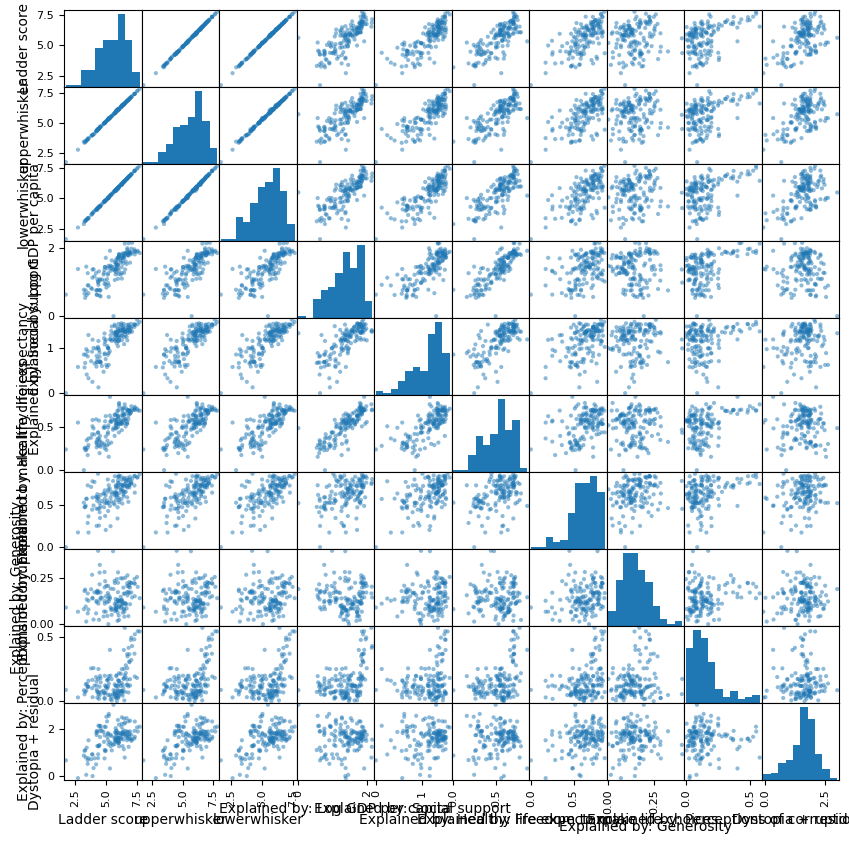

In [30]:
pd.plotting.scatter_matrix(happiness, figsize=(10, 10));

Figure 1. This is a scatter matrix plotting each element of the World Happiness Report for 2024 against each other element. Histograms can be seen on the diagonals because that shows the element graphed against itself. The other plots show the respective values for one element from a certain country against another element from the same country. By itself, this data is hard to interpret and gaining relavent information is hard.

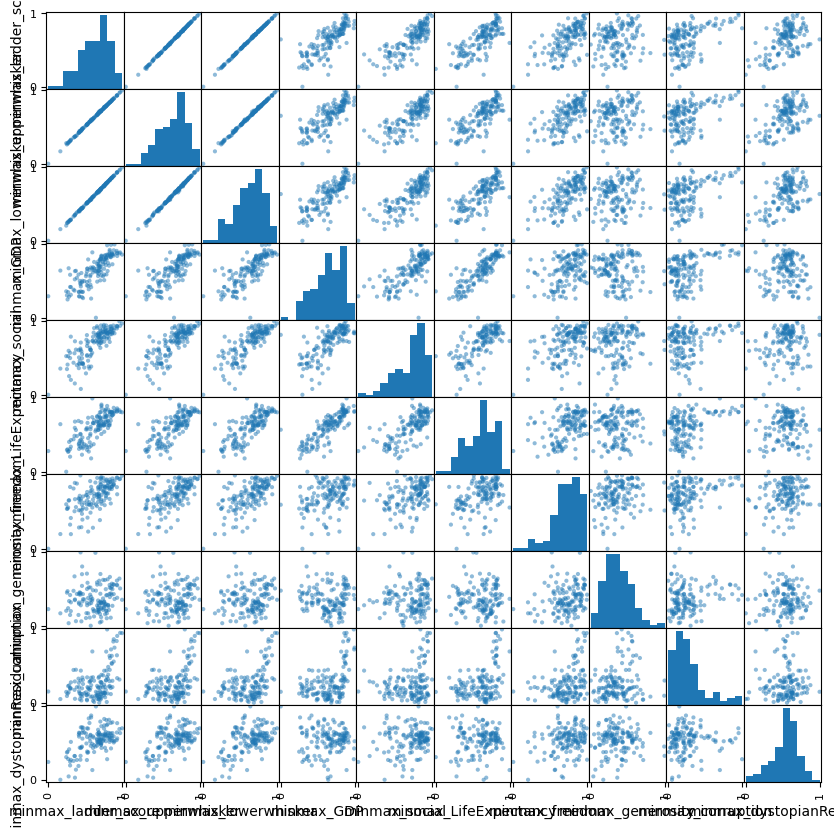

In [29]:
pd.plotting.scatter_matrix(happiness_minmax, figsize=(10, 10));

Figure 2. This is the same scatter matrix as before. Some elements may be hard to compare, leading to problems with analyzing the data. One way this can be remedied is with scaling. This plot is minmax scaled, which redefines the range of the data so that the maximum corresponds to 1 and the minimum corresponds to 0. Notice, the plots are identical to the previous, however, the numbers on the axises have changed.

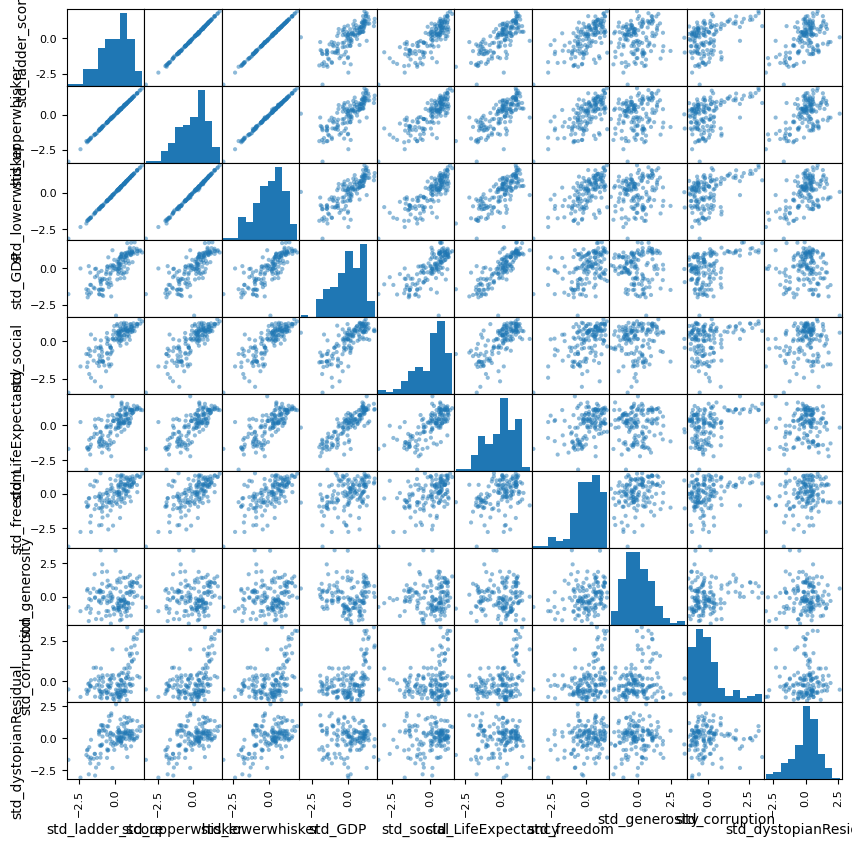

In [31]:
pd.plotting.scatter_matrix(happiness_standard, figsize=(10, 10));

Figure 3. This figure is also identical to the previous. It uses the standardized scaling method, which ensure a mean of 1 and a standard deviation of 1. These scalings are done in order to make analyzing/clustering the data easier and more reliable.

Task 5: Using KMeans clustering, cluster the scaled numerical features (choose either scaling) that are used to calculate the score: 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual' into 3 clusters


Task 6: Make a scatter plot with the cluster (0, 1, or 2) on the X axis, and the Happiness score with its errorbar on the Y axis and, as usual, comment on the figure your what, how, wow


Task 7: extra credit for 461, required for 661: repeat for 2, 3, 4, 5 , 6, 7 and make a plot of KMeans intracluster variance vs the number of clusters (respectively Y and X) and discuss if this plots allows for a robust selection of the correct number of clusters code that does clustering and inertia elbow plots can be foung here

In [50]:
happiness_minmax

,Country,minmax_ladder_score,minmax_upperwhisker,minmax_lowerwhisker,minmax_GDP,minmax_social,minmax_LifeExpectancy,minmax_freedom,minmax_generosity,minmax_corruption,minmax_dystopianResidual
0,Finland,1.000000,1.000000,1.000000,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726
1,Denmark,0.973754,0.975166,0.972167,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275
2,Iceland,0.964120,0.967384,0.961000,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306
3,Sweden,0.934053,0.934934,0.933333,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660
4,Israel,0.933555,0.932119,0.935000,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),0.261462,0.279305,0.243500,0.249416,0.411255,0.305718,0.548088,0.471322,0.125217,0.382612
139,Sierra Leone,0.253156,0.263411,0.242833,0.305465,0.350031,0.295216,0.543453,0.451372,0.092174,0.371540
140,Lesotho,0.243355,0.280464,0.206167,0.360112,0.526283,0.000000,0.606025,0.204489,0.147826,0.308694
141,Lebanon,0.163787,0.169205,0.158167,0.643157,0.356834,0.648775,0.200463,0.169576,0.050435,0.000000


In [57]:
happiness_minmax[['minmax_GDP', 'minmax_social']]

,minmax_GDP,minmax_social
0,0.861280,0.972171
1,0.891172,0.940012
2,0.878561,1.000000
3,0.877160,0.928262
4,0.842130,0.935683
...,...,...
138,0.249416,0.411255
139,0.305465,0.350031
140,0.360112,0.526283
141,0.643157,0.356834


In [85]:
km = skl.cluster.KMeans(n_clusters = 3, random_state = 121)
km.get_params()
happiness_minmax_km = happiness_minmax[['minmax_GDP', 'minmax_social', 'minmax_LifeExpectancy', 'minmax_freedom', 'minmax_generosity', 'minmax_corruption', 'minmax_dystopianResidual']]
happiness_minmax_km = happiness_minmax_km.dropna()
km.fit(happiness_minmax_km), km.labels_, km.cluster_centers_

(KMeans(n_clusters=3, random_state=121),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2,
        1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2], dtype=int32),
 array([[0.89264029, 0.87999529, 0.82235928, 0.87137891, 0.49020306,
         0.6978882 , 0.52847684],
        [0.70975557, 0.79251288, 0.68040451, 0.75171881, 0.31521197,
         0.1910029 , 0.55531097],
        [0.41325209, 0.46117951, 0.38164315, 0.59096176, 0.38936749,
         0.19418972, 0.50963559]]))

In [95]:
happiness_minmax.loc[happiness_minmax_km.index, 'cluster'] = km.labels_

In [87]:
happiness_minmax_km

,minmax_GDP,minmax_social,minmax_LifeExpectancy,minmax_freedom,minmax_generosity,minmax_corruption,minmax_dystopianResidual
0,0.861280,0.972171,0.810968,0.995365,0.354115,0.949565,0.701726
1,0.891172,0.940012,0.815636,0.953650,0.508728,0.953043,0.636275
2,0.878561,1.000000,0.837806,0.949015,0.643392,0.316522,0.691306
3,0.877160,0.928262,0.844807,0.971031,0.551122,0.911304,0.563660
4,0.842130,0.935683,0.863477,0.742758,0.381546,0.335652,0.772061
...,...,...,...,...,...,...,...
138,0.249416,0.411255,0.305718,0.548088,0.471322,0.125217,0.382612
139,0.305465,0.350031,0.295216,0.543453,0.451372,0.092174,0.371540
140,0.360112,0.526283,0.000000,0.606025,0.204489,0.147826,0.308694
141,0.643157,0.356834,0.648775,0.200463,0.169576,0.050435,0.000000


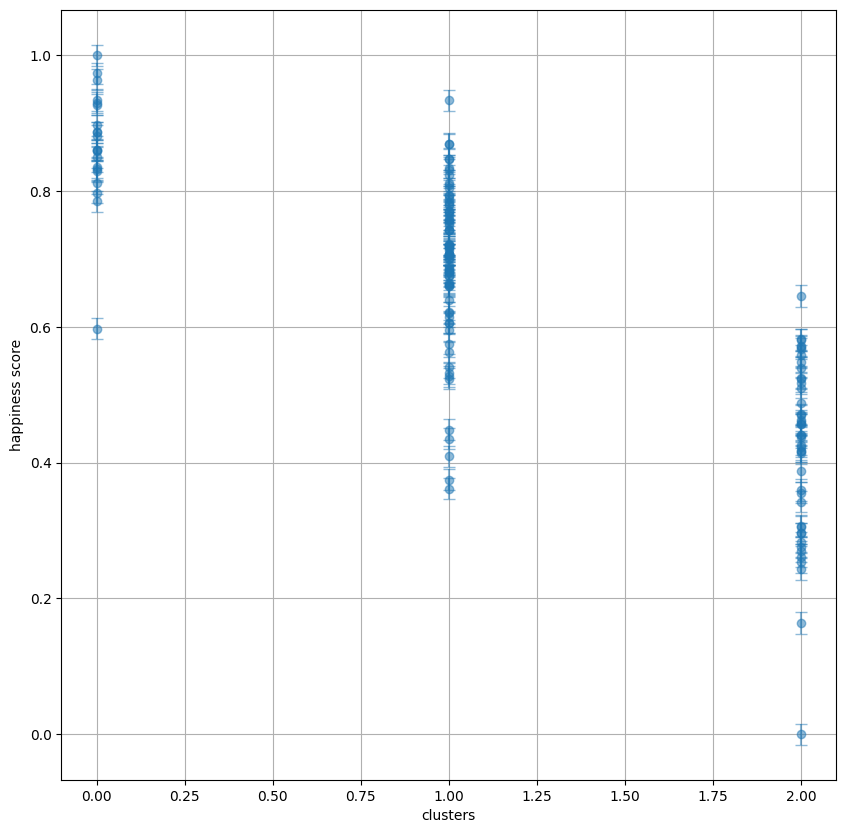

In [94]:
x = happiness_minmax['cluster']
y = happiness_minmax['minmax_ladder_score']
#yerr = happiness_minmax['minmax_upperwhisker'] - happiness_minmax['minmax_lowerwhisker']
yerr = happiness_minmax['minmax_upperwhisker'].mean() - happiness_minmax['minmax_lowerwhisker'].mean()
pl.figure(figsize=(10, 10))
pl.errorbar(x, y, yerr, fmt='o', capsize=4, alpha=0.5)
pl.grid(True)
pl.xlabel('clusters')
pl.ylabel('happiness score')
pl.show()


Figure 4. This plot shows the clusters on the x-axis and the total happiness score per country on the y-axis. The clusters were calculated using the KMeans function from sklearn (using KMeans to calculate the cluster groups). The happiness score corresponds to the ladder score from the 2024 World Happiness Report (https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024). As three clusters were used, there are three discrete locations on the x-axis for the data points to align. This data does show a noticable correlation between the clusters and happiness. Similarity between factors like GDP, social relationships, corruption and freedom were used to group the clusters together. The countries similar in these metrics tend to have similar happiness levels.

Task 7 Attempt.

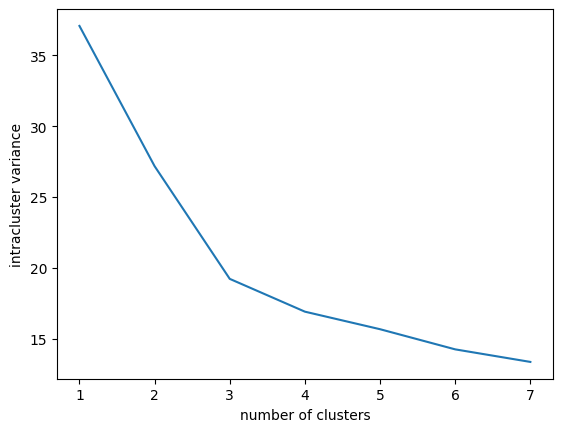

In [125]:
km = skl.cluster.KMeans(n_clusters = 7, random_state = 121)
km.get_params()
happiness_minmax_km = happiness_minmax[['minmax_GDP', 'minmax_social', 'minmax_LifeExpectancy', 'minmax_freedom', 'minmax_generosity', 'minmax_corruption', 'minmax_dystopianResidual']]
happiness_minmax_km = happiness_minmax_km.dropna()
km.fit(happiness_minmax_km), km.labels_, km.cluster_centers_
#happiness_minmax.loc[happiness_minmax_km.index, 'cluster'] = km.labels_


tv = []
for i in range(1, 8):
    km = skl.cluster.KMeans(n_clusters = i, random_state = 121).fit(happiness_minmax_km)
    tv.append(km.inertia_)
pl.plot(range(1, 8), tv)
pl.xlabel("number of clusters")
pl.ylabel("intracluster variance");

Figure 5. This is a plot of the 'Elbow Method', which shows how the intracluster variance(y-axis) changes as a function of the number of clusters (x-axis). The 'elbow' point represents the area where the change in the variance will begin to diminish significantly as more clusters are added. On this plot, that point seems to be at 3 clusters.

This plot does appear to have a distinct elbow. Before that point, large changes in the variance can be seen, while after it they get noticably smaller. I think that this does accurately determine a good ammount of clusters to use for this data.